In [57]:
import pandas as pd, numpy as np, seaborn as sns,matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

file_paths = [
    "/Users/chiaralu/Desktop/施工/Interviews/Technical/HOOPP/Data/parking-tickets-2017/Parking_Tags_Data_2017_3.csv",
    "/Users/chiaralu/Desktop/施工/Interviews/Technical/HOOPP/Data/parking-tickets-2017/Parking_Tags_Data_2017_2.csv",
    "/Users/chiaralu/Desktop/施工/Interviews/Technical/HOOPP/Data/parking-tickets-2017/Parking_Tags_Data_2017_1.csv",
    "/Users/chiaralu/Desktop/施工/Interviews/Technical/HOOPP/Data/parking-tickets-2018/Parking_Tags_Data_2018_3.csv",
    "/Users/chiaralu/Desktop/施工/Interviews/Technical/HOOPP/Data/parking-tickets-2018/Parking_Tags_Data_2018_2.csv",
    "/Users/chiaralu/Desktop/施工/Interviews/Technical/HOOPP/Data/parking-tickets-2018/Parking_Tags_Data_2018_1.csv",
    "/Users/chiaralu/Desktop/施工/Interviews/Technical/HOOPP/Data/parking-tickets-2019/Parking_Tags_Data_2019.008.csv",
    "/Users/chiaralu/Desktop/施工/Interviews/Technical/HOOPP/Data/parking-tickets-2019/Parking_Tags_Data_2019.007.csv",
    "/Users/chiaralu/Desktop/施工/Interviews/Technical/HOOPP/Data/parking-tickets-2019/Parking_Tags_Data_2019.006.csv",
    "/Users/chiaralu/Desktop/施工/Interviews/Technical/HOOPP/Data/parking-tickets-2019/Parking_Tags_Data_2019.005.csv",
    "/Users/chiaralu/Desktop/施工/Interviews/Technical/HOOPP/Data/parking-tickets-2019/Parking_Tags_Data_2019.004.csv",
    "/Users/chiaralu/Desktop/施工/Interviews/Technical/HOOPP/Data/parking-tickets-2019/Parking_Tags_Data_2019.003.csv",
    "/Users/chiaralu/Desktop/施工/Interviews/Technical/HOOPP/Data/parking-tickets-2019/Parking_Tags_Data_2019.002.csv",
    "/Users/chiaralu/Desktop/施工/Interviews/Technical/HOOPP/Data/parking-tickets-2019/Parking_Tags_Data_2019.001.csv",
    "/Users/chiaralu/Desktop/施工/Interviews/Technical/HOOPP/Data/parking-tickets-2019/Parking_Tags_Data_2019.000.csv",
    "/Users/chiaralu/Desktop/施工/Interviews/Technical/HOOPP/Data/parking-tickets-2020/Parking_Tags_Data_2020.005.csv",
    "/Users/chiaralu/Desktop/施工/Interviews/Technical/HOOPP/Data/parking-tickets-2020/Parking_Tags_Data_2020.004.csv",
    "/Users/chiaralu/Desktop/施工/Interviews/Technical/HOOPP/Data/parking-tickets-2020/Parking_Tags_Data_2020.003.csv",
    "/Users/chiaralu/Desktop/施工/Interviews/Technical/HOOPP/Data/parking-tickets-2020/Parking_Tags_Data_2020.002.csv",
    "/Users/chiaralu/Desktop/施工/Interviews/Technical/HOOPP/Data/parking-tickets-2020/Parking_Tags_Data_2020.001.csv",
    "/Users/chiaralu/Desktop/施工/Interviews/Technical/HOOPP/Data/parking-tickets-2020/Parking_Tags_Data_2020.000.csv"
]


# Initialize an empty DataFrame
data = pd.DataFrame()

# Read and append the data
for file_path in file_paths:
    df = pd.read_csv(file_path)
    data = data.append(df, ignore_index=True)

# Preprocessing

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7806116 entries, 0 to 7806115
Data columns (total 11 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   tag_number_masked       object 
 1   date_of_infraction      int64  
 2   infraction_code         float64
 3   infraction_description  object 
 4   set_fine_amount         int64  
 5   time_of_infraction      float64
 6   location1               object 
 7   location2               object 
 8   location3               object 
 9   location4               object 
 10  province                object 
dtypes: float64(2), int64(2), object(7)
memory usage: 655.1+ MB


In [59]:
data.head()

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province
0,***54540,20170904,29.0,PARK PROHIBITED TIME NO PERMIT,30,28.0,NR,49 CARROLL ST,NaN,NaN,ON
1,***05804,20170904,363.0,PARK ONSTRT ACCESSIBLE NO PRMT,450,29.0,W/S,ABELL ST,N/O,SUDBURY ST,ON
2,***09621,20170904,5.0,PARK-SIGNED HWY-PROHIBIT DY/TM,50,29.0,NR,5332 YONGE ST,NaN,NaN,ON
3,***23833,20170904,29.0,PARK PROHIBITED TIME NO PERMIT,30,29.0,OPP,34 BEACONSFIELD AVE,NaN,NaN,ON
4,***67830,20170904,29.0,PARK PROHIBITED TIME NO PERMIT,30,29.0,NR,19 MOUNTNOEL AVE,NaN,NaN,ON


In [60]:
# Clean dates
data['date_of_infraction'] = pd.to_datetime(data['date_of_infraction'], format='%Y%m%d', errors='coerce')
data['date_of_infraction'].head()

0   2017-09-04
1   2017-09-04
2   2017-09-04
3   2017-09-04
4   2017-09-04
Name: date_of_infraction, dtype: datetime64[ns]

In [61]:
# check for duplicates
data.duplicated().sum()

# There are 2 duplicates, we should drop them
data.drop_duplicates(inplace=True)

In [ ]:
# Drop columns that are not useful
drop_colums = ['tag_number_masked', 'time_of_infraction', 'location1', 'location3', 'location4']
data.drop(drop_colums, axis=1, inplace=True)

In [66]:
# check for missing values
data.isnull().sum()

# Since only 0.1% of data have missing values, we can drop them
data.dropna(inplace=True)
print(data.shape)

data.isnull().sum()


(7805338, 6)


date_of_infraction        0
infraction_code           0
infraction_description    0
set_fine_amount           0
location2                 0
province                  0
dtype: int64

In [67]:
# Remove numbers in addresses and use Title case
data['location'] = data['location2'].str.replace('\d+', '')
data['location'] = data['location'].str.title()
data['location'].head()

0           Carroll St
1             Abell St
2             Yonge St
3     Beaconsfield Ave
4        Mountnoel Ave
Name: location, dtype: object

In [68]:
# Fix format for infraction descriptions
data['infraction_description'] = data['infraction_description'].str.title()
data['infraction_description'].head()

0    Park Prohibited Time No Permit
1    Park Onstrt Accessible No Prmt
2    Park-Signed Hwy-Prohibit Dy/Tm
3    Park Prohibited Time No Permit
4    Park Prohibited Time No Permit
Name: infraction_description, dtype: object

In [69]:
# Count final number of rows
data.shape

#Initial data shape was (7806116, 11) 

(7805338, 7)

In [107]:
# export to csv
data.to_csv('parking_tickets.csv', index=False)


# Exploratory Analysis

Average number of tickets per year:  1951334.5


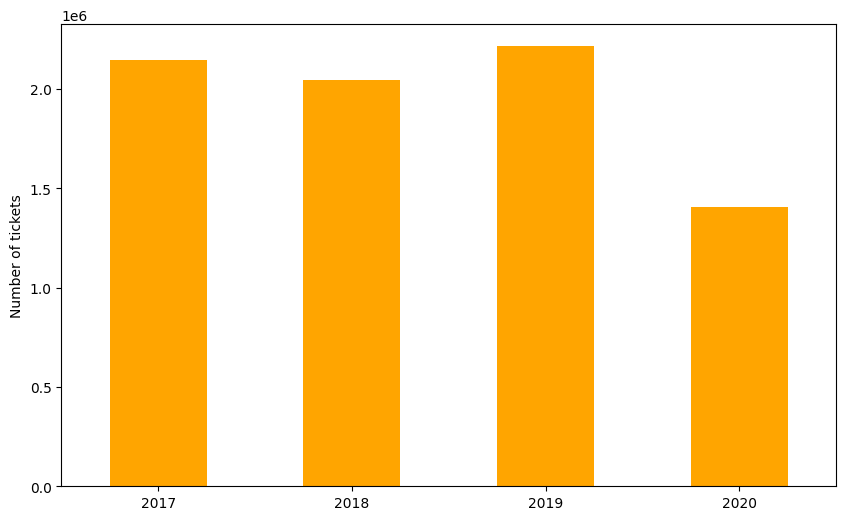

In [89]:
# Plot number of tickets by year
data['year'] = data['date_of_infraction'].dt.year
freq_y = data['year'].value_counts().sort_index()
freq_y.plot(kind='bar', figsize=(10, 6), rot=0, color = 'orange')
plt.ylabel('Number of tickets')

#compute average number of tickets per year
avg = data['year'].value_counts().mean()
print('Average number of tickets per year: ', avg)


In [91]:
freq_y

2017    2143917
2018    2044113
2019    2213764
2020    1403544
Name: year, dtype: int64

Text(0.5, 0, 'Month')

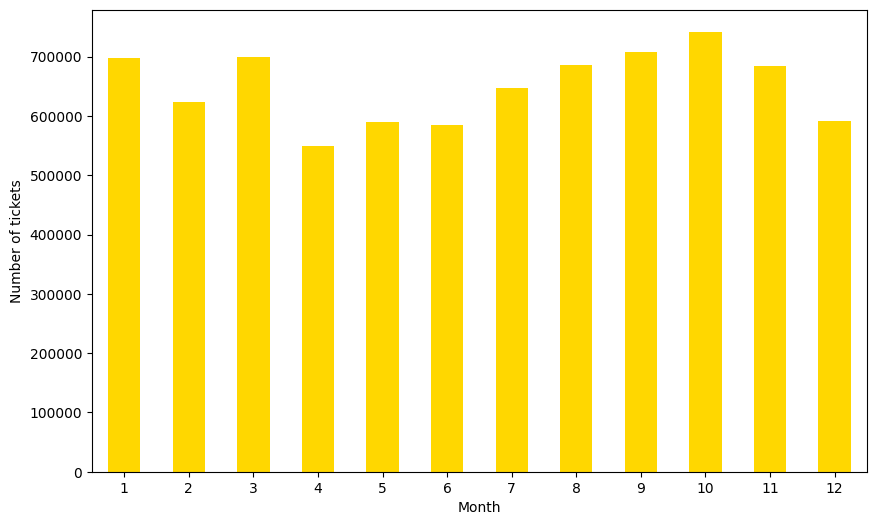

In [92]:
# Plot number of tickets by month

data['month'] = data['date_of_infraction'].dt.month
freq_m = data['month'].value_counts().sort_index()
freq_m.plot(kind='bar', figsize=(10, 6), rot = 0, color = "gold")
plt.ylabel('Number of tickets')
plt.xlabel('Month')

In [93]:
freq_m

1     697271
2     624138
3     699122
4     549242
5     589410
6     585396
7     647807
8     685633
9     708165
10    742162
11    684635
12    592357
Name: month, dtype: int64

# Revenue Analysis

Text(0.5, 0, 'Year')

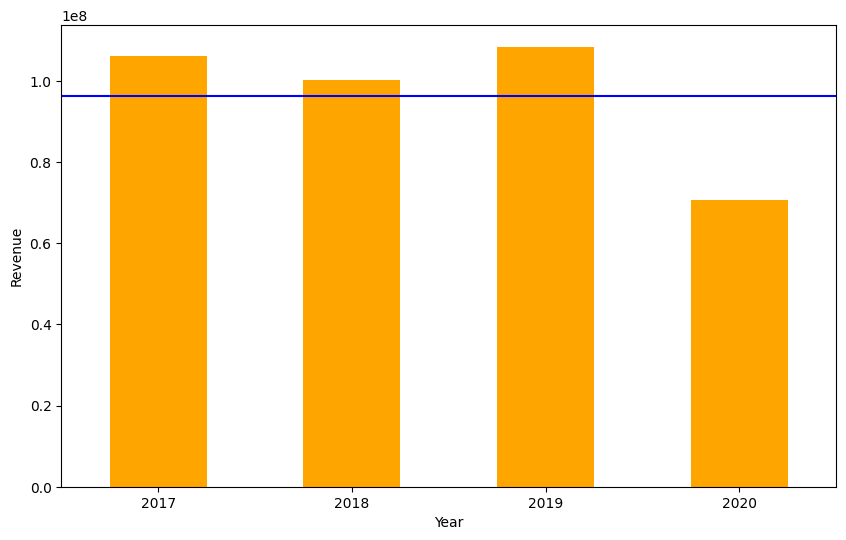

In [106]:
# Calculate revenue by year
revenue = data.groupby('year')['set_fine_amount'].sum()
revenue.plot(kind='bar', figsize=(10, 6), rot=0, color = 'orange')

# Add a line for average revenue
plt.axhline(y=revenue.mean(), color='b', linestyle='-')
plt.ylabel('Revenue')
plt.xlabel('Year')


In [104]:
revenue.mean()
print(revenue)
print("Average revenue per year: $", revenue.mean())

year
2017    106181250
2018    100198095
2019    108416600
2020     70550280
Name: set_fine_amount, dtype: int64
Average revenue per year: $ 96336556.25


## Total Fines Collected by Year

Total fines for 2017: $78125490
Total fines for 2018: $72789775
Total fines for 2019: $76536745
Total fines for 2020: $48158205


Text(0.5, 0, 'Year')

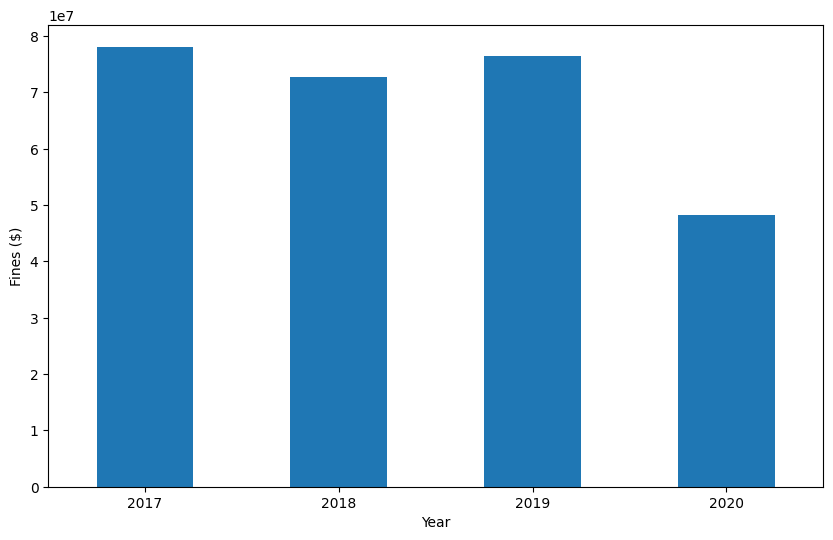

In [33]:
def calculate_sum_of_fines(data, year):
    # Filter data for the specified year
    year_data = data[data['year'] == year]
    
    # Sum fines for the specified year
    fines_sum = year_data['set_fine_amount'].sum()
    
    print(f'Total fines for {year}: ${fines_sum}')

for i in range(2017, 2021):
    calculate_sum_of_fines(data, i)

# plot fines by year in bar chart
freq = data.groupby('year')['set_fine_amount'].sum()
freq.plot(kind='bar', figsize=(10, 6), rot=0)
plt.ylabel('Fines ($)')
plt.xlabel('Year')



## Total Fines by Province

In [41]:
data['province'].value_counts()

ON    5044122
QC      88027
AB      25196
NY      17536
AZ      14123
       ...   
WY         29
GO         16
HI         14
NL          3
PR          3
Name: province, Length: 69, dtype: int64

Text(0.5, 1.0, 'Tickets by province')

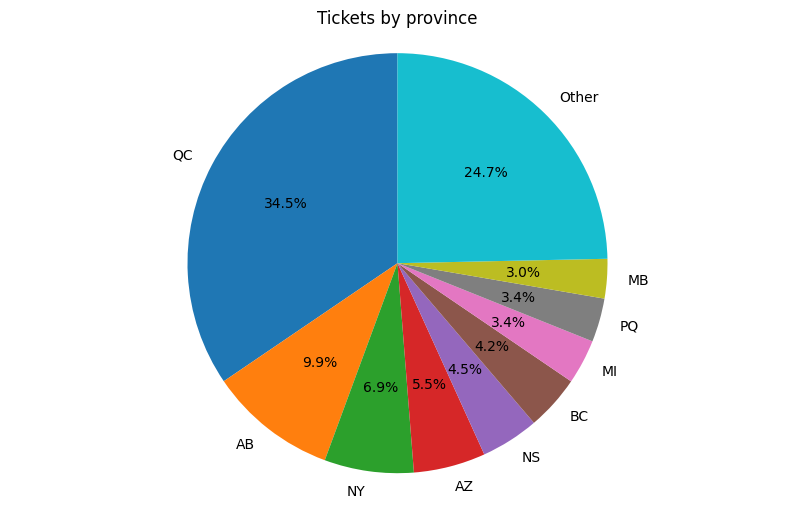

In [42]:
# Pie chart for tickets by province
freq = data[data['province'] != 'ON']['province'].value_counts()

#group those that are less than 2% into 'Other'
freq['Other'] = freq[freq < 0.02 * freq.sum()].sum()
freq = freq[freq > 0.02 * freq.sum()]
    
freq.plot(kind='pie', figsize=(10, 6), autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.ylabel('')
plt.title('Tickets by province')
